### Загрузим датасет

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [3]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

#### 1. Предобработка данных

##### 1.1 Познакомимся с данными

In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [7]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

##### 1.2 Уберем пропуски и дубликаты

In [8]:
df = df.drop_duplicates() # уберем дупликаты

In [9]:
df.isna().sum() # проверим на пропуски

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [10]:
df = df.dropna() # уберем строки с пропусками, если их мало
df = df.dropna(axis=1) # уберем колонки с пропусками (how='any' по умолчанию)

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # или median, most_frequent, constant
imputer.fit(df)  # обучаем на одной колонке, но можно и на всех сразу
df = pd.DataFrame(imputer.transform(df), columns=df.columns)  # применяем к колонке

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='distance') # отнормировать перед применением
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

##### 1.3 Предварительный анализ

Посмотрим сбалансированность классов.

In [14]:
import matplotlib.pyplot as plt

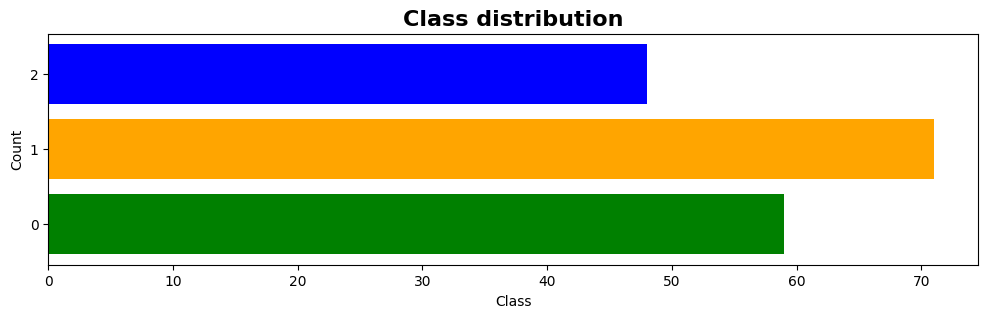

In [20]:
counts = pd.DataFrame(df['target'].value_counts())

plt.figure(figsize=(12, 3))
plt.barh(y=counts.index, width=counts['count'], color=['orange', 'green', 'blue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.yticks([0, 1, 2])
plt.title('Class distribution', fontweight='bold', fontsize=16)
plt.show()

Отношения признаков.

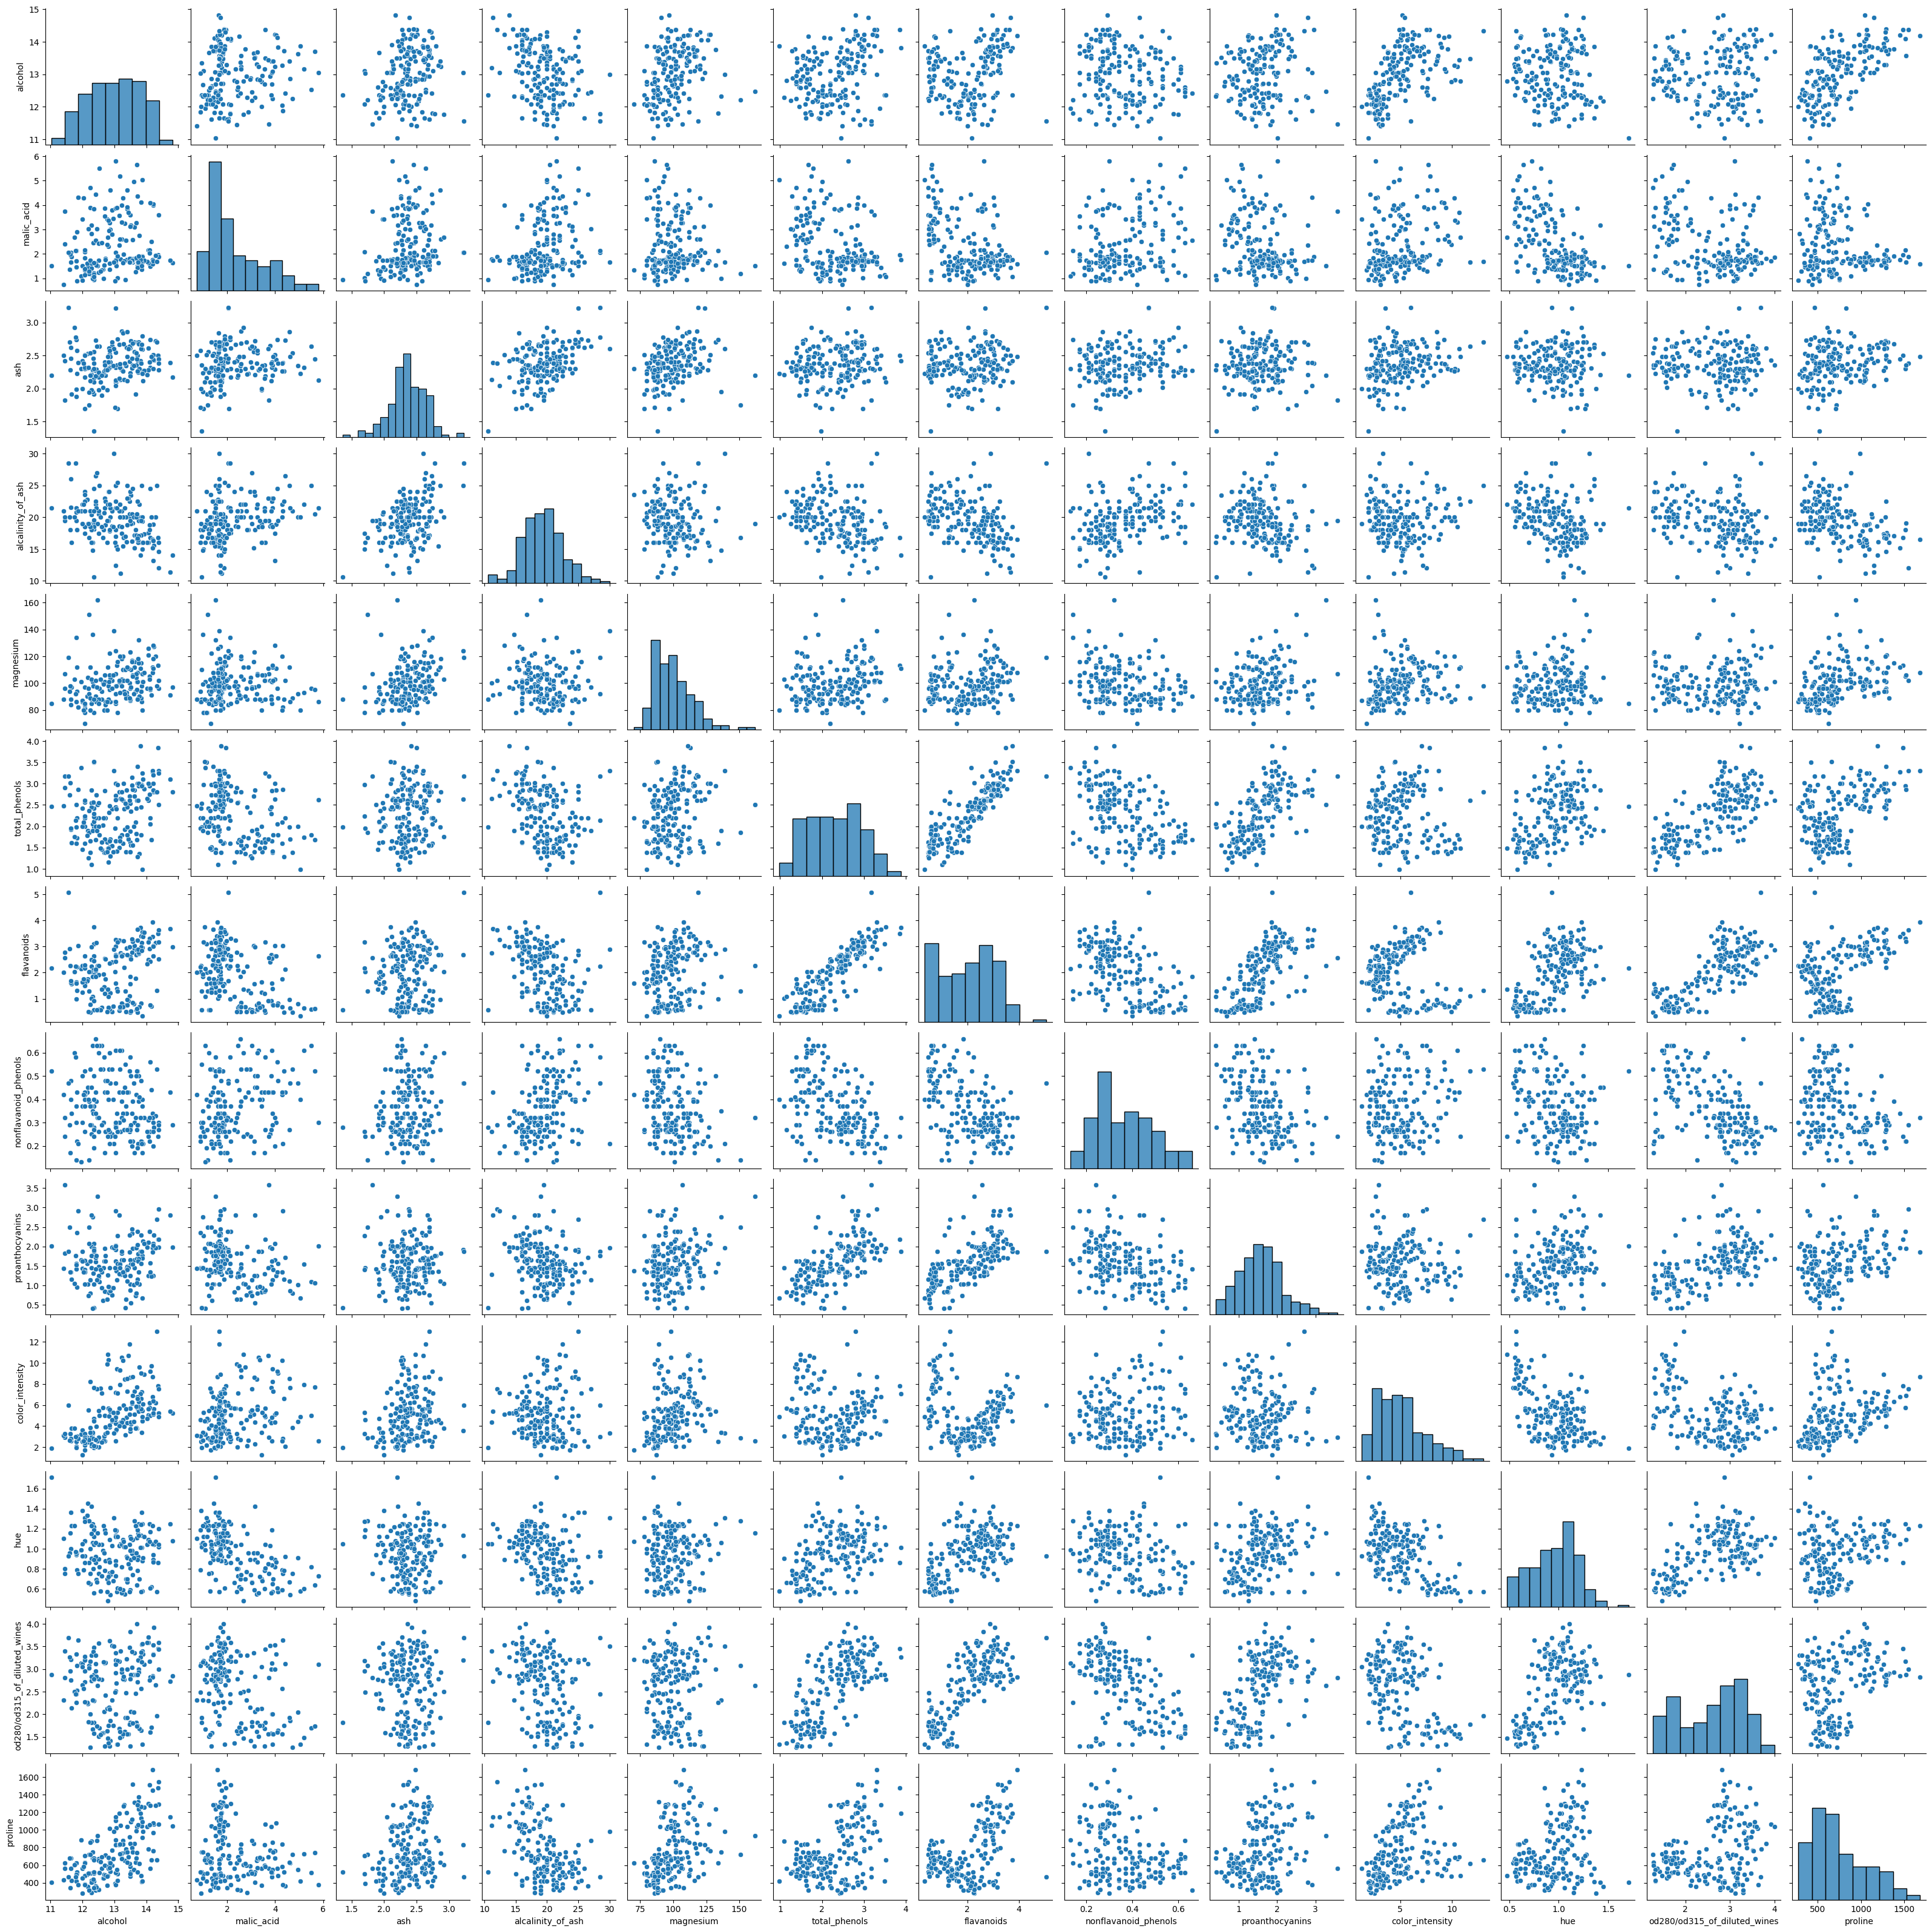

In [21]:
import seaborn as sns
sns.pairplot(df.drop('target', axis=1))
plt.show()

Распределение признаков.

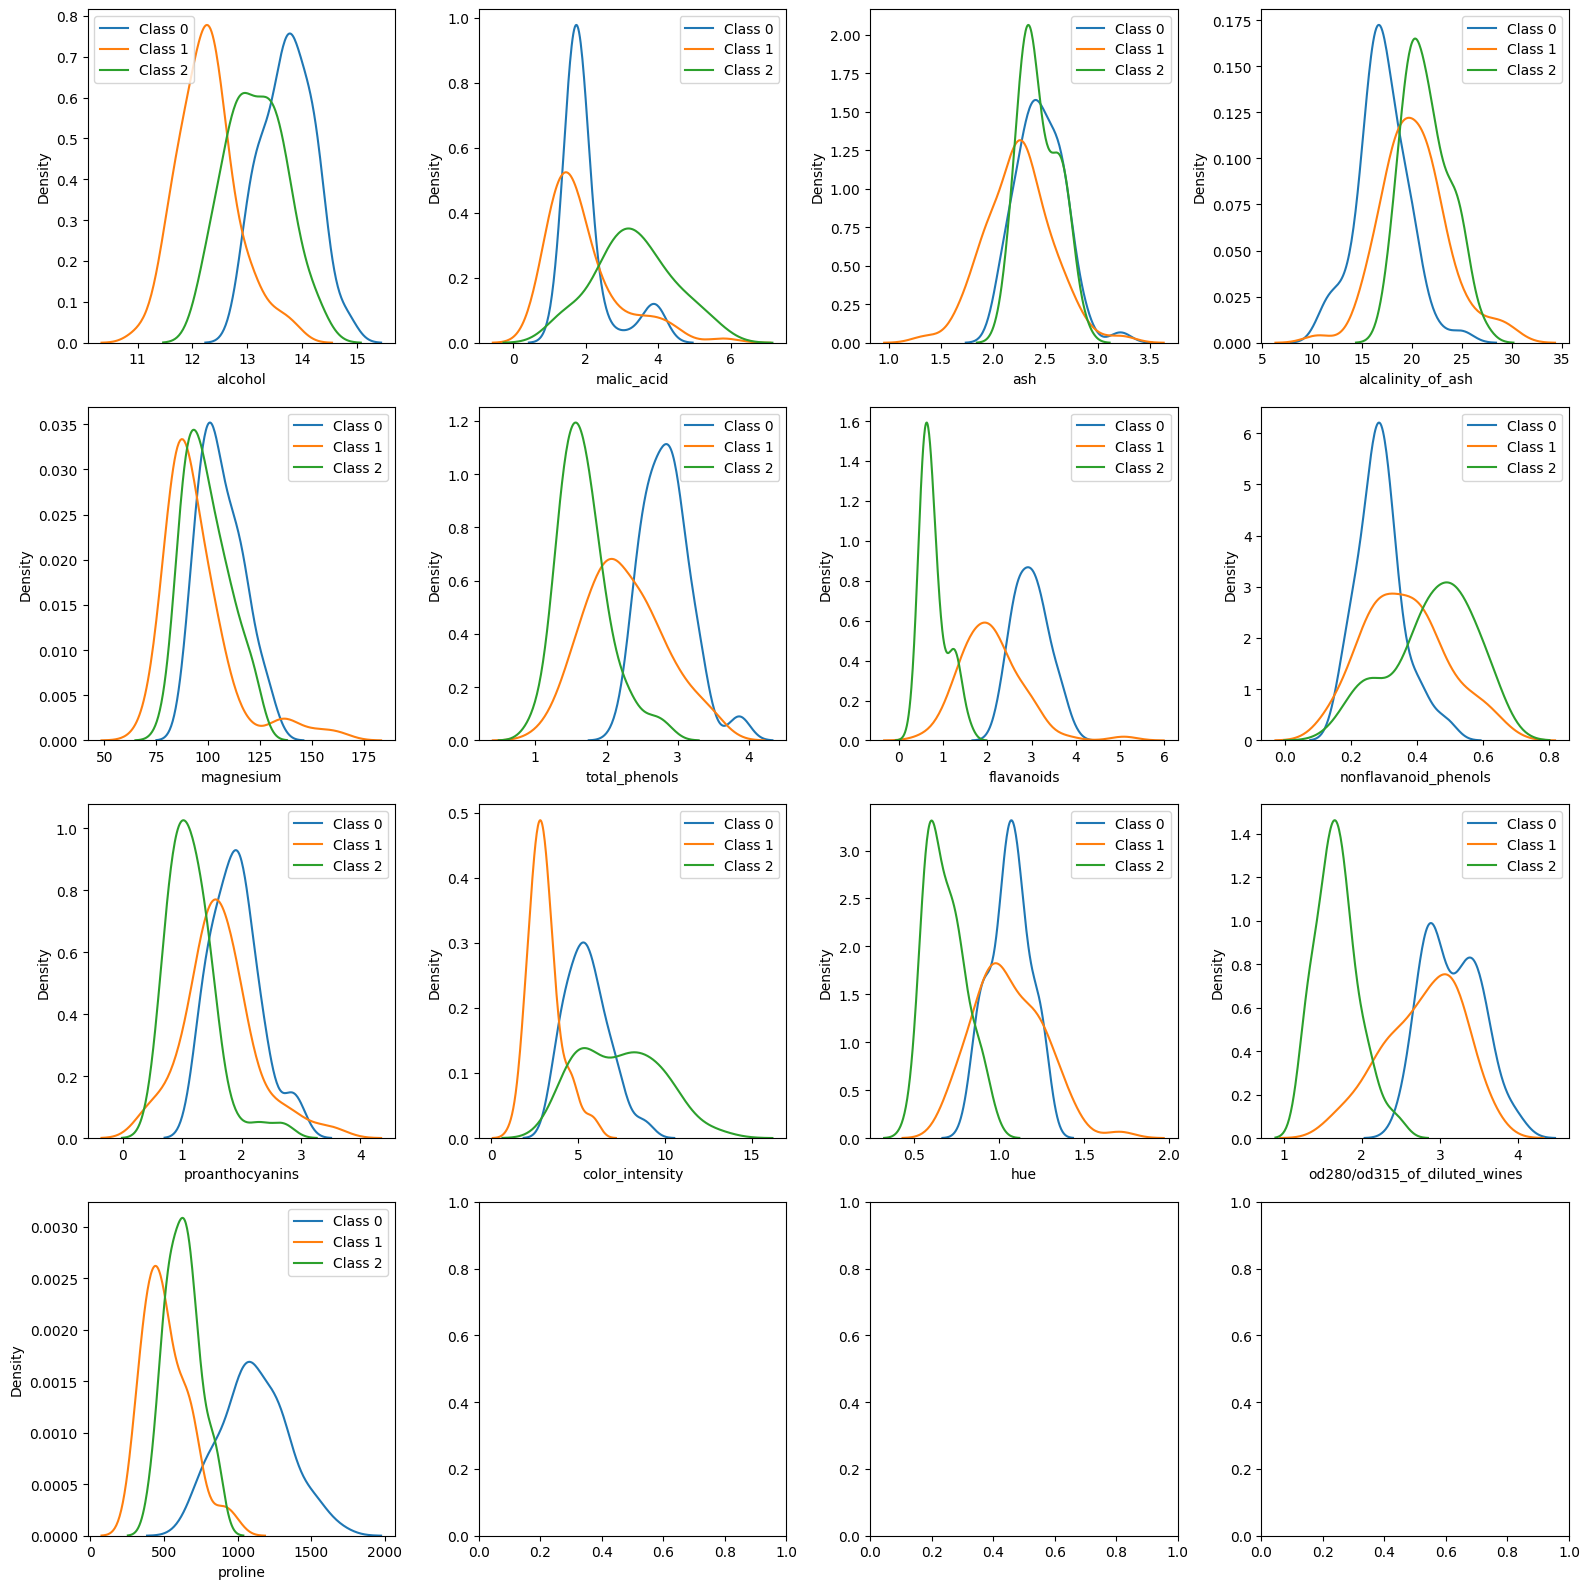

In [41]:
features = df.drop('target', axis=1).columns
figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for f, ax in zip(features, axes.flatten()):
    sns.kdeplot(df[df['target'] == 0][f], label='Class 0', ax=ax)
    sns.kdeplot(df[df['target'] == 1][f], label='Class 1', ax=ax)
    sns.kdeplot(df[df['target'] == 2][f], label='Class 2', ax=ax)
    ax.legend()
plt.tight_layout()
plt.show()

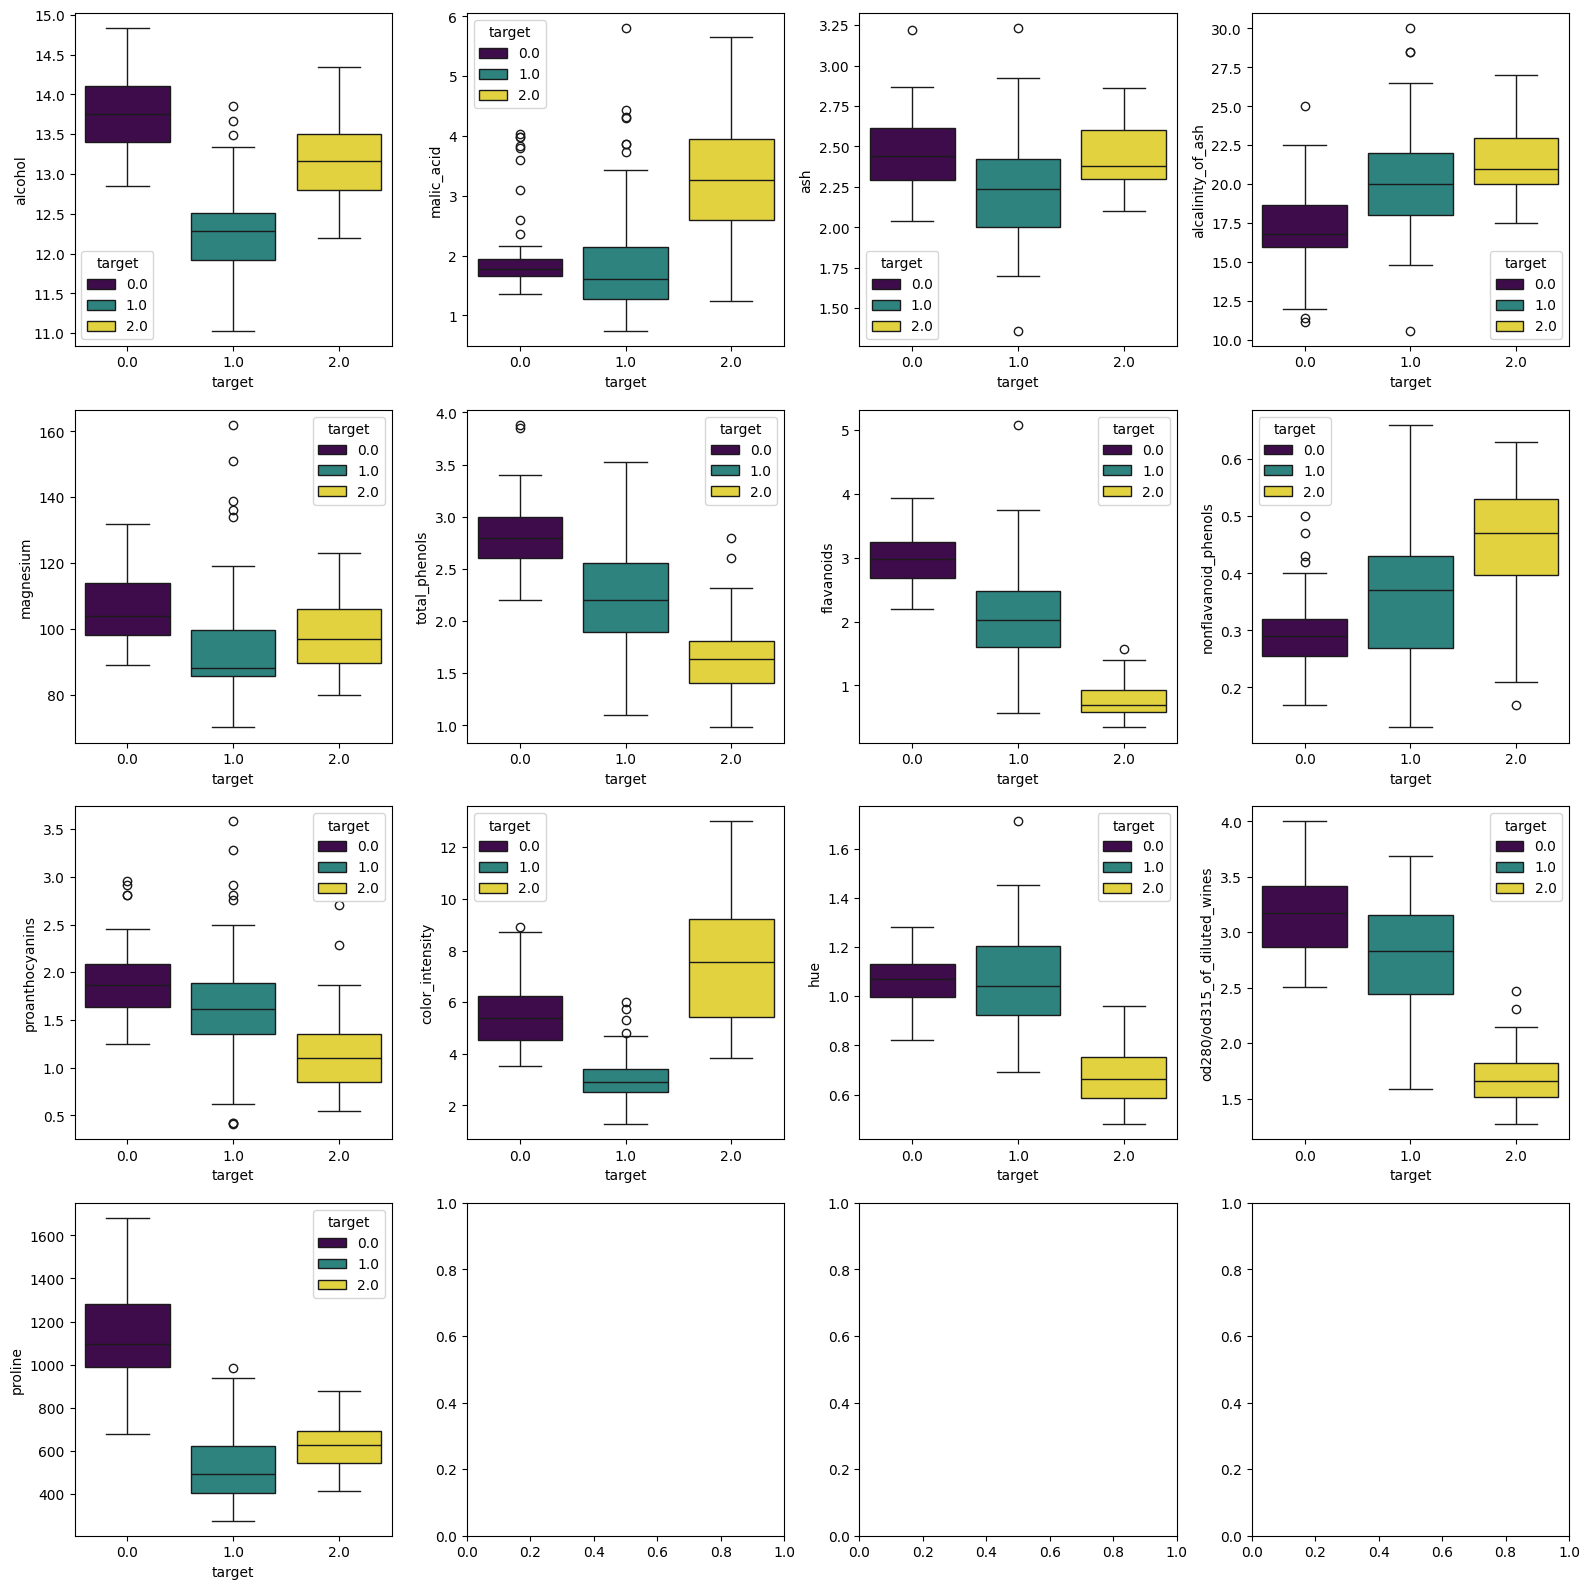

In [45]:
figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for f, ax in zip(df.columns[:-1], axes.flatten()):
    sns.boxplot(data=df, x='target', y=f, palette='viridis', ax=ax, hue='target')
plt.tight_layout()
plt.show()

Корреляции

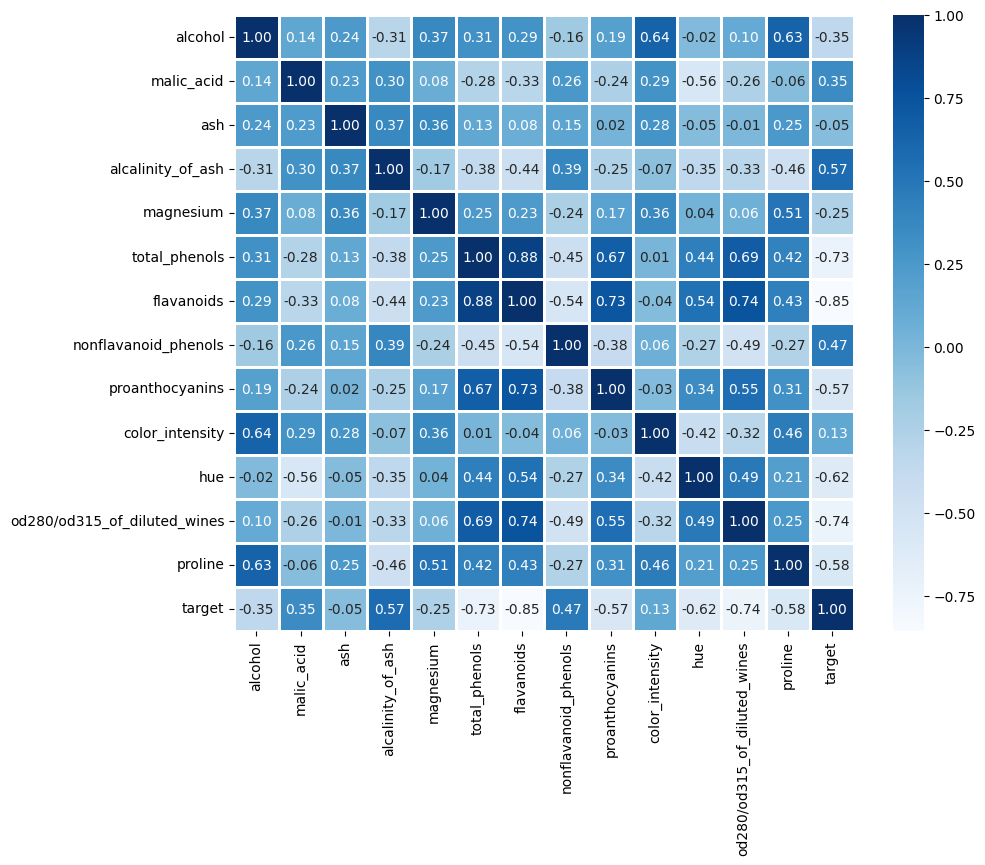

In [46]:
from matplotlib import colormaps # значения для cmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f', linewidths=2)
plt.show()

#### 2. Обработка данных.

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

Отскалируем данные.

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train)
X_test[X_train.columns] = scaler.transform(X_test)

#### 3. KNNClassifier

Кросс валидация для подбора гиперпарметров

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors' : np.arange(1, 50, 2),
    'metric' : ['euclidean', 'manhattan', 'cityblock'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance']
}

knn = KNeighborsClassifier(n_jobs=1)
search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1, scoring='accuracy')
search.fit(X_train, y_train)
search.best_params_

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': np.int64(9),
 'weights': 'uniform'}

In [53]:
knn = KNeighborsClassifier(**search.best_params_).fit(X_train, y_train)

In [54]:
from sklearn.metrics import accuracy_score

print(f'Accuracy train {accuracy_score(y_train, knn.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, knn.predict(X_test))}')

Accuracy train 0.9919354838709677
Accuracy test 0.9444444444444444


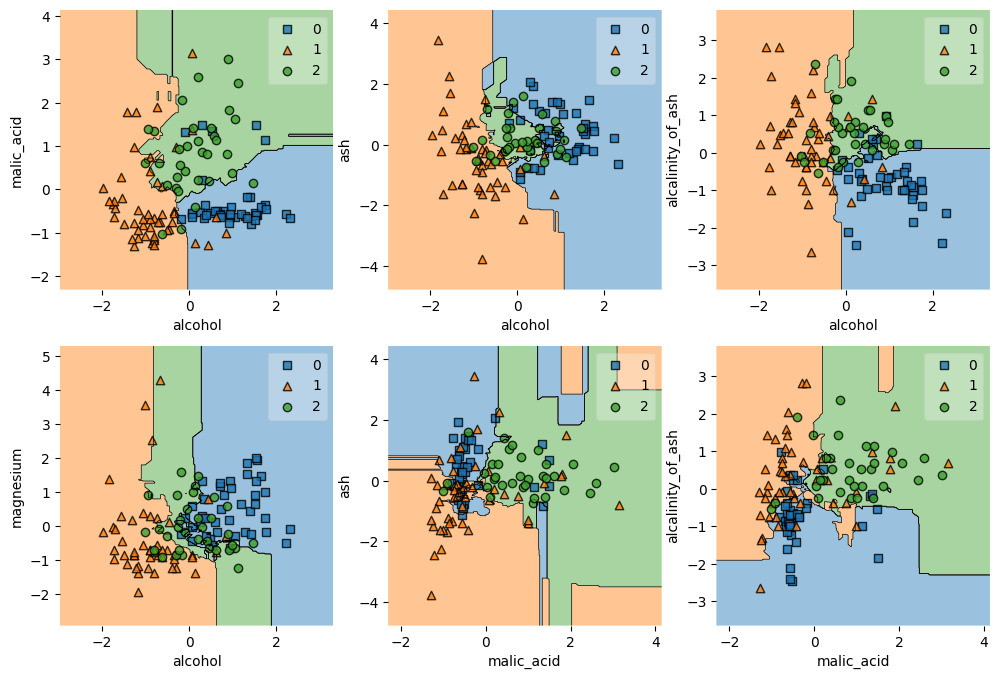

In [55]:
from mlxtend.plotting import plot_decision_regions

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
features = []
for f1 in range(len(X_train.columns) - 8):
    for f2 in range(f1 + 1, len(X_train.columns) - 8):
        features.append((X_train.columns[f1], X_train.columns[f2]))

for f, ax in zip(features, axes.flatten()):
    plot_decision_regions(np.array(X_train[[f[0], f[1]]]), np.array(y_train, dtype=int), KNeighborsClassifier(**search.best_params_).fit(np.array(X_train[[f[0], f[1]]]), y_train), ax=ax, n_jobs=-1)
    ax.set_xlabel(f[0])
    ax.set_ylabel(f[1])

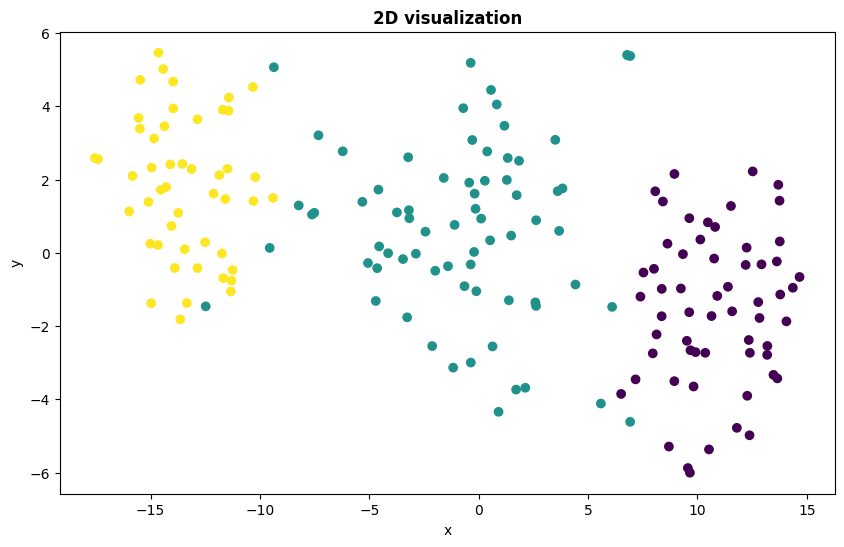

In [56]:
from sklearn.manifold import TSNE

df_2d = TSNE(n_components=2, n_jobs=-1, early_exaggeration=5, perplexity=30).fit_transform(pd.concat([X_train, X_test], ignore_index=True))

plt.figure(figsize=(10, 6))
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=pd.concat((y_train, y_test)))
plt.title('2D visualization', fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [57]:
import plotly.express as px

df_3d = TSNE(n_components=3, n_jobs=-1, random_state=1233).fit_transform(pd.concat([X_train, X_test], ignore_index=True))
px.scatter_3d(x=df_3d[:, 0], y=df_3d[:, 1], z=df_3d[:, 2], color=pd.concat((y_train, y_test))).show()

#### 4. Логистическая регрессия

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [60]:
log_reg_cv = LogisticRegressionCV(cv=5, max_iter=1000, n_jobs=-1, scoring=None).fit(X_train, y_train)

In [61]:
log_reg = LogisticRegression(penalty='l2', C=log_reg_cv.C_[0], n_jobs=-1).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, log_reg.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, log_reg.predict(X_test))}')

Accuracy train 1.0
Accuracy test 0.9814814814814815


#### 5. RidgeClassiffier

In [62]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier

In [63]:
ridge_cv = RidgeClassifierCV(alphas=np.arange(0.01, 10, 0.1), cv=5).fit(X_train, y_train)

In [64]:
ridge = RidgeClassifier(alpha=ridge_cv.alpha_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, ridge.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, ridge.predict(X_test))}')

Accuracy train 1.0
Accuracy test 0.9814814814814815


#### 6. SVM Classifier

In [65]:
from sklearn.svm import SVC

svc = SVC()

param_grid = {
    'C' : np.arange(0.1, 10, 0.1),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto']
}

search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1).fit(X_train, y_train)
search.best_params_

{'C': np.float64(0.2), 'gamma': 'scale', 'kernel': 'sigmoid'}

In [66]:
svc = SVC(**search.best_params_).fit(X_train, y_train)

print(f'Accuracy train {accuracy_score(y_train, svc.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, svc.predict(X_test))}')

Accuracy train 0.9919354838709677
Accuracy test 0.9814814814814815


#### 7. Trees

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth' : np.arange(2, 7),
    'min_samples_split' : np.arange(2, 10),
    'min_samples_leaf' : np.arange(1, 10)
}

search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1).fit(X_train, y_train)
search.best_params_

Fitting 2 folds for each of 360 candidates, totalling 720 fits


{'max_depth': np.int64(3),
 'min_samples_leaf': np.int64(4),
 'min_samples_split': np.int64(2)}

In [80]:
dt = DecisionTreeClassifier(**search.best_params_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, dt.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, dt.predict(X_test))}')

Accuracy train 0.9919354838709677
Accuracy test 0.8703703703703703


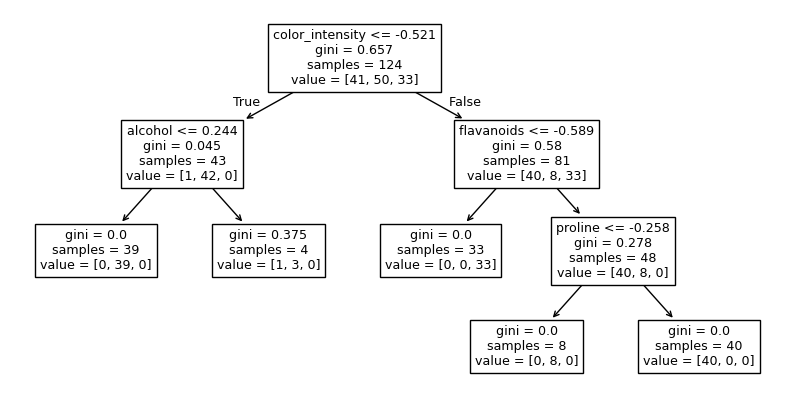

In [81]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 5))
plot_tree(dt, feature_names=dt.feature_names_in_)
plt.show()

#### 8. AdaBoost

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3))

param_grid = {
    'n_estimators' : np.arange(50, 501, 50),
    'learning_rate' : np.arange(0.1, 5.01, 0.1),
}

search = GridSearchCV(adaboost, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3, verbose=1).fit(X_train, y_train)
search.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


{'learning_rate': np.float64(0.1), 'n_estimators': np.int64(50)}

In [84]:
adaboost = AdaBoostClassifier(**search.best_params_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, adaboost.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, adaboost.predict(X_test))}')

Accuracy train 0.967741935483871
Accuracy test 0.9259259259259259


#### 9. Bagging

In [85]:
from sklearn.ensemble import BaggingClassifier

In [86]:
bagging = BaggingClassifier(n_jobs=-1)

param_grid = {
    'n_estimators' : np.arange(10, 220, 10),
    'max_samples' : [0.5, 0.75, 1],
    'max_features' : [0.5, 0.75, 1]
}
search = GridSearchCV(bagging, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=3, verbose=1).fit(X_train, y_train)
search.best_params_

Fitting 3 folds for each of 189 candidates, totalling 567 fits


{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': np.int64(100)}

In [87]:
bagging = BaggingClassifier(**search.best_params_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, bagging.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, bagging.predict(X_test))}')

Accuracy train 1.0
Accuracy test 0.9814814814814815


#### 10. GradientBoosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gradient_boosting = GradientBoostingClassifier()

param_grid = {
    'loss' : ['log_loss'],
    'learning_rate' : np.arange(0.1, 3.01, 0.5),
    'n_estimators' : np.arange(100, 501, 100),
    'subsample' : [0.5, 0.75, 1],
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_depth' : np.arange(1, 3)
}

search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=3, verbose=1).fit(X_train, y_train)
search.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


{'criterion': 'friedman_mse',
 'learning_rate': np.float64(2.6),
 'loss': 'log_loss',
 'max_depth': np.int64(2),
 'n_estimators': np.int64(400),
 'subsample': 0.75}

In [90]:
gradient_boosting = GradientBoostingClassifier(**search.best_params_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, bagging.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, bagging.predict(X_test))}')

Accuracy train 1.0
Accuracy test 0.9814814814814815


#### 11. RandomForest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'n_estimators' : np.arange(100, 1001, 100),
    'max_features' : ['sqrt', 'log2']
}

search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=5, scoring='accuracy', verbose=1).fit(X_train, y_train)
search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_features': 'sqrt', 'n_estimators': np.int64(200)}

In [93]:
rf = RandomForestClassifier(**search.best_params_).fit(X_train, y_train)
print(f'Accuracy train {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Accuracy test {accuracy_score(y_test, rf.predict(X_test))}')

Accuracy train 1.0
Accuracy test 0.9814814814814815


## Бинарная классификация.

In [110]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = pd.concat([data.data, data.target], axis=1)
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

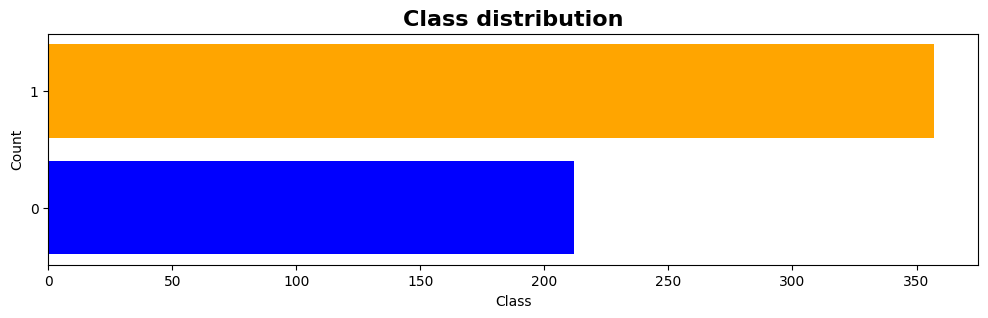

In [111]:
counts = pd.DataFrame(df['target'].value_counts())

plt.figure(figsize=(12, 3))
plt.barh(y=counts.index, width=counts['count'], color=['orange', 'blue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.yticks([0, 1])
plt.title('Class distribution', fontweight='bold', fontsize=16)
plt.show()

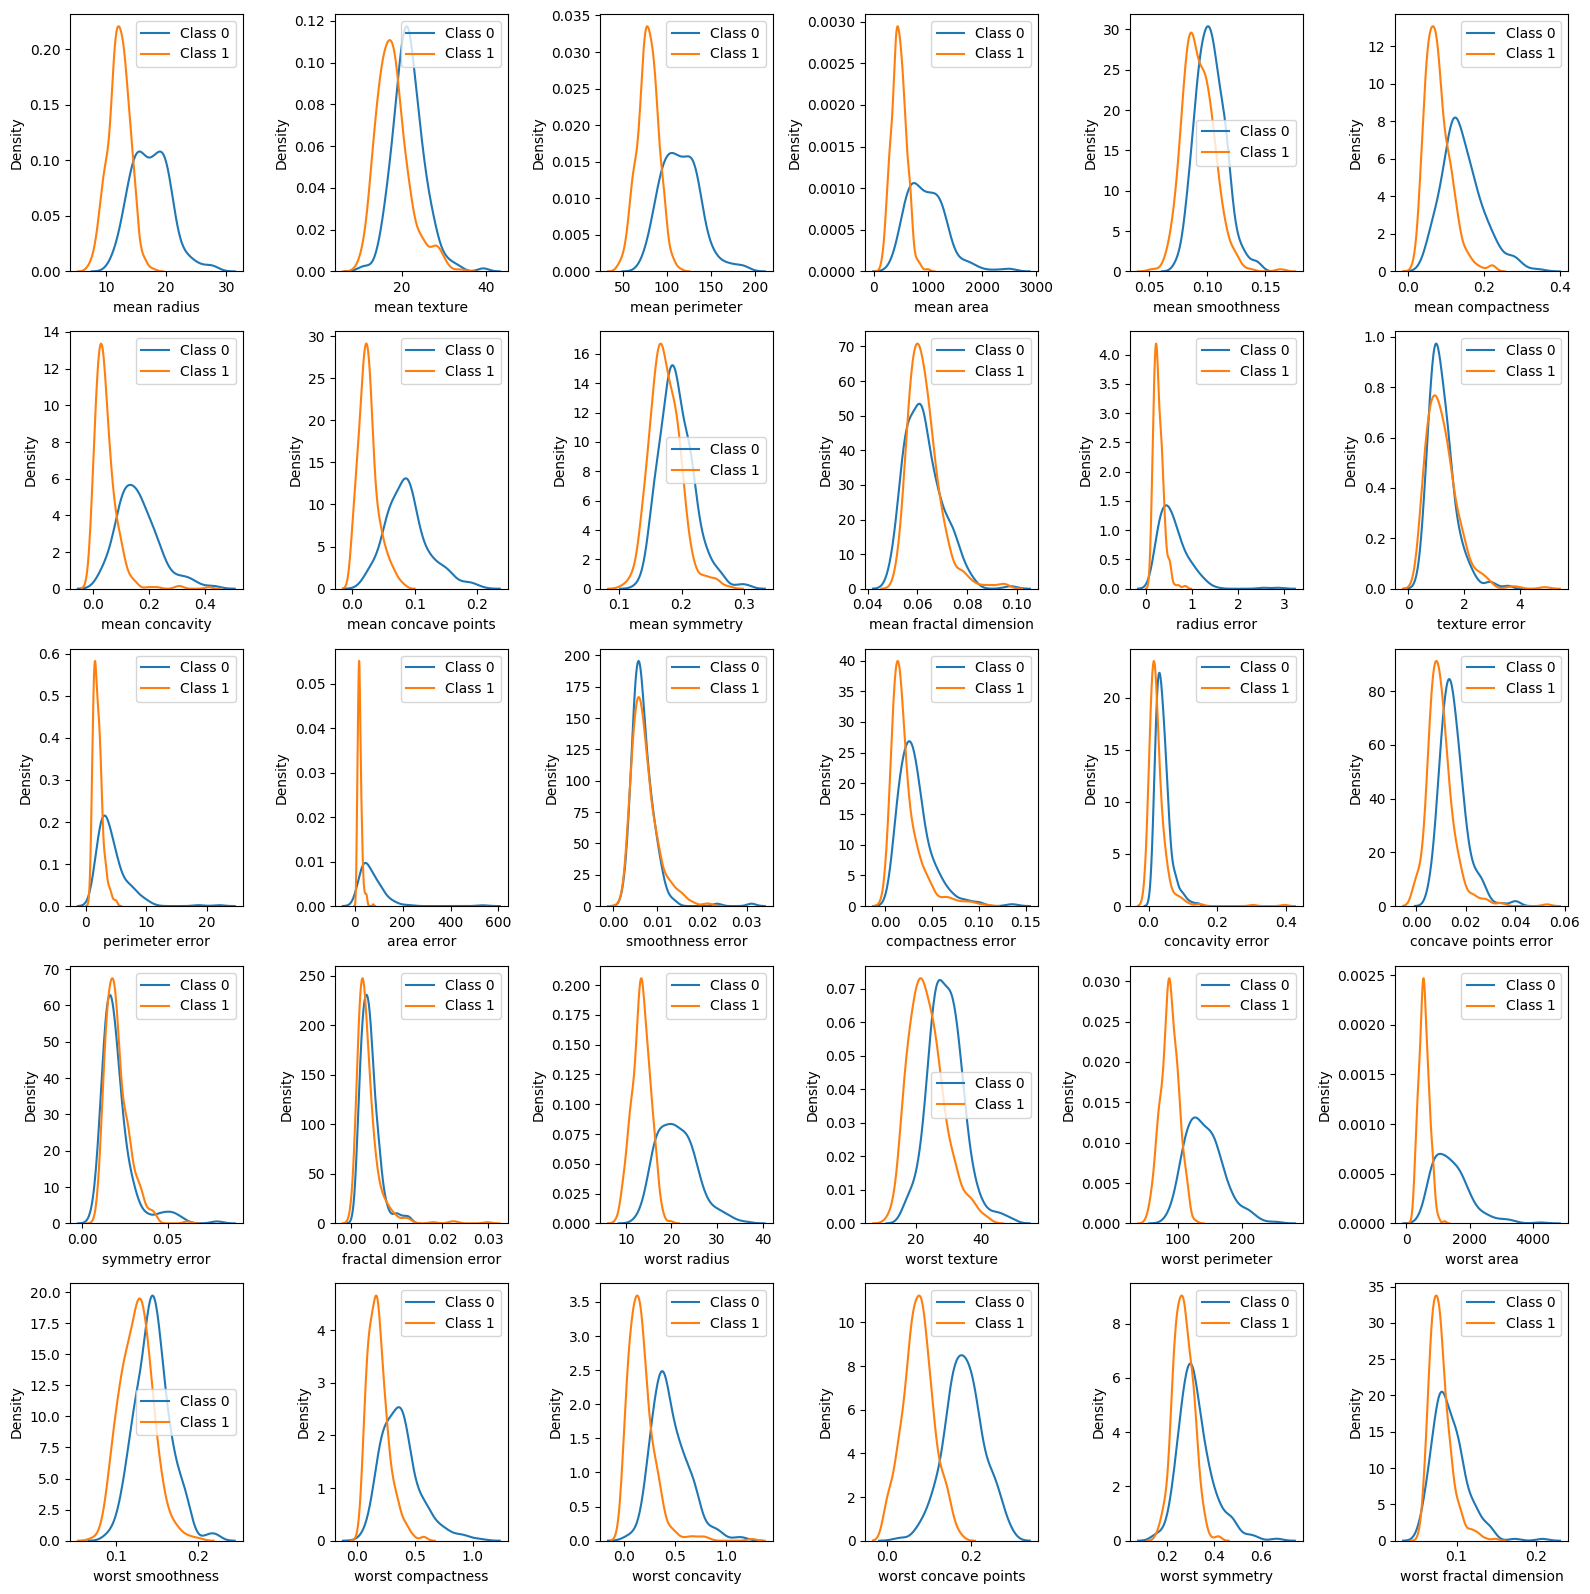

In [112]:
features = df.drop('target', axis=1).columns
figure, axes = plt.subplots(nrows=5, ncols=6, figsize=(16, 16))
for f, ax in zip(features, axes.flatten()):
    sns.kdeplot(df[df['target'] == 0][f], label='Class 0', ax=ax)
    sns.kdeplot(df[df['target'] == 1][f], label='Class 1', ax=ax)
    ax.legend()
plt.tight_layout()
plt.show()

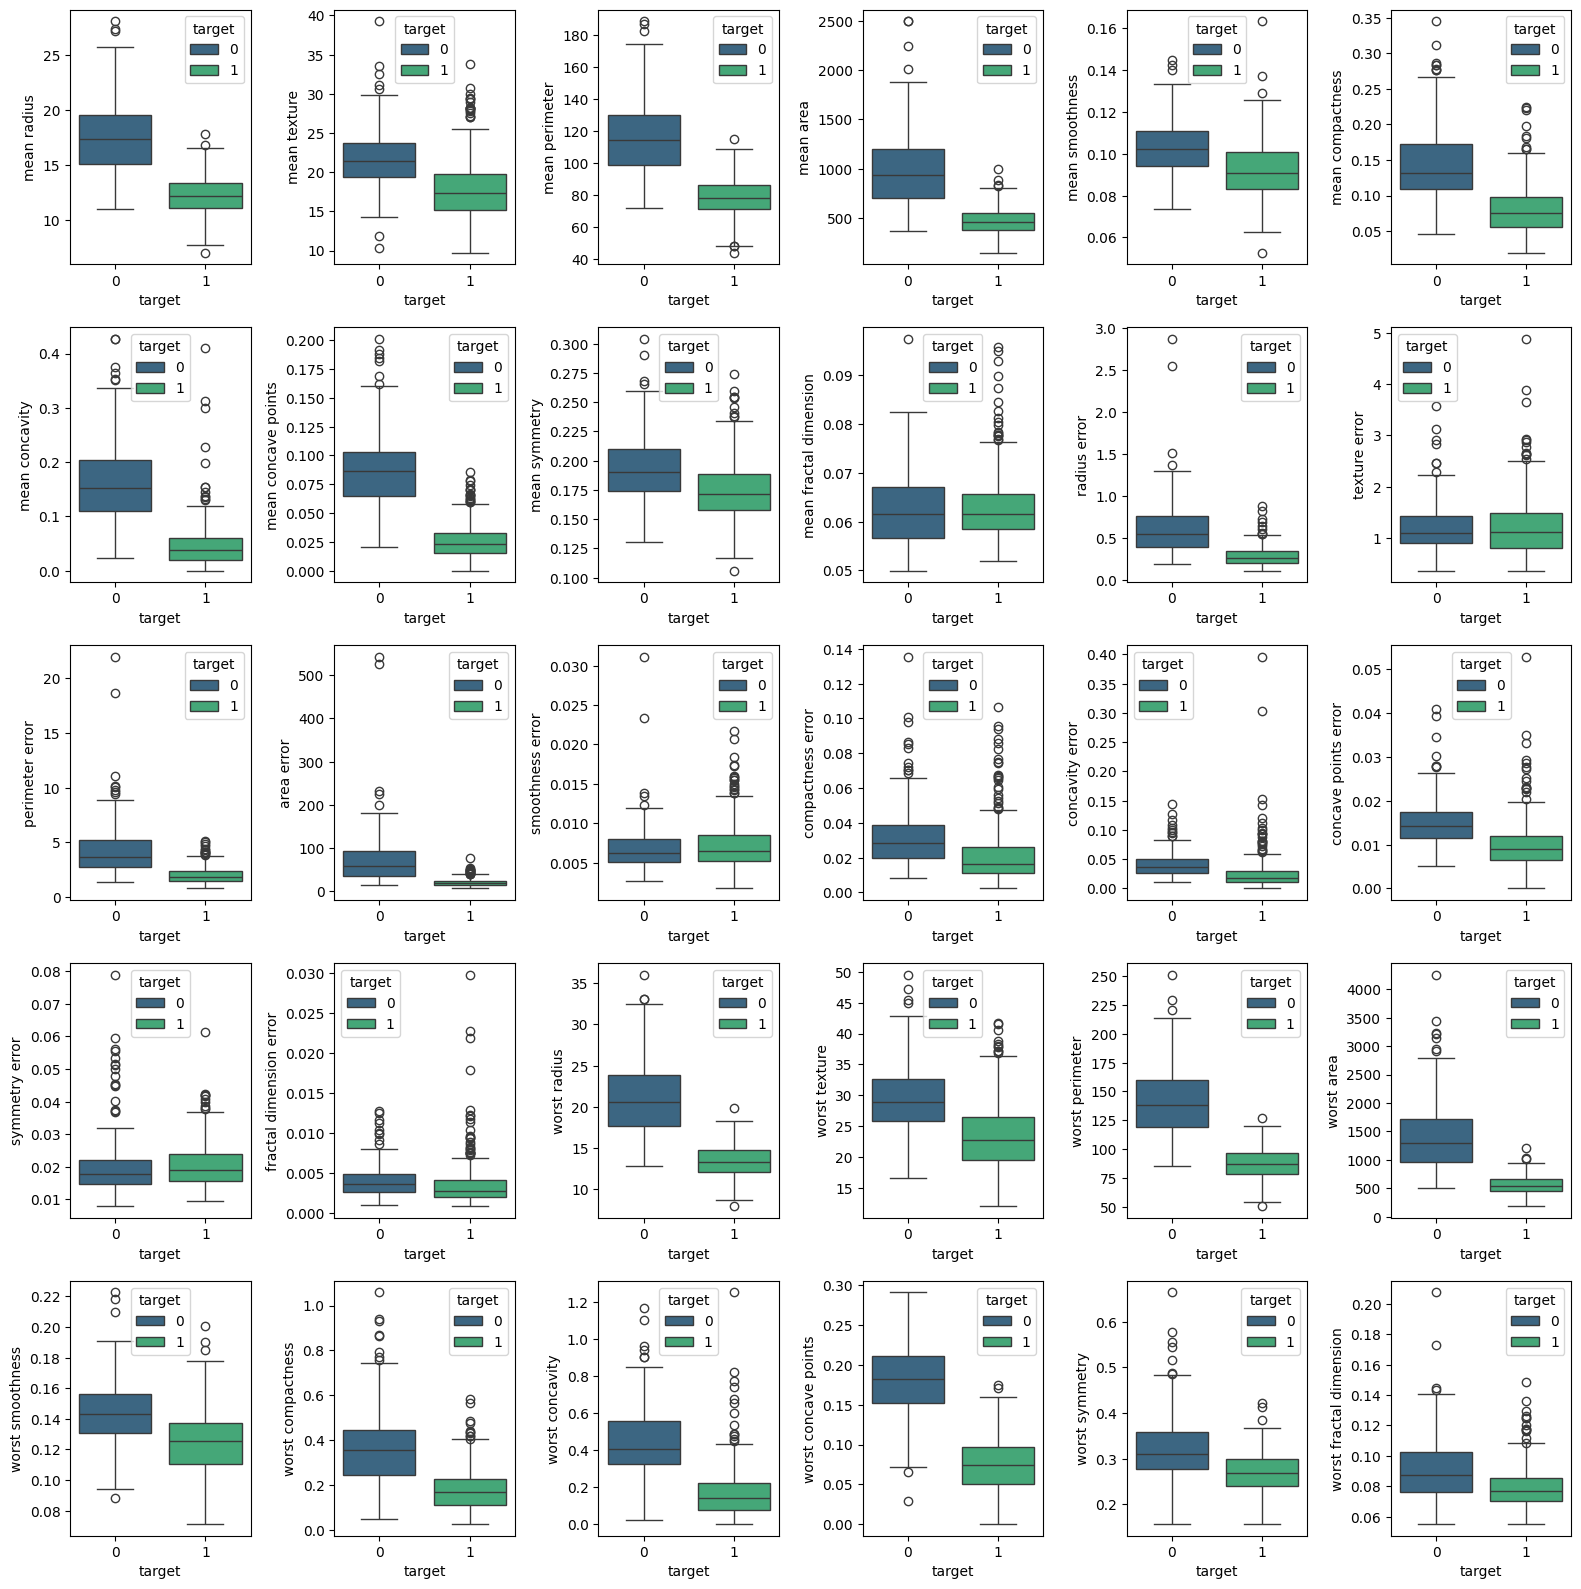

In [113]:
figure, axes = plt.subplots(nrows=5, ncols=6, figsize=(16, 16))
for f, ax in zip(df.columns[:-1], axes.flatten()):
    sns.boxplot(data=df, x='target', y=f, palette='viridis', ax=ax, hue='target')
plt.tight_layout()
plt.show()

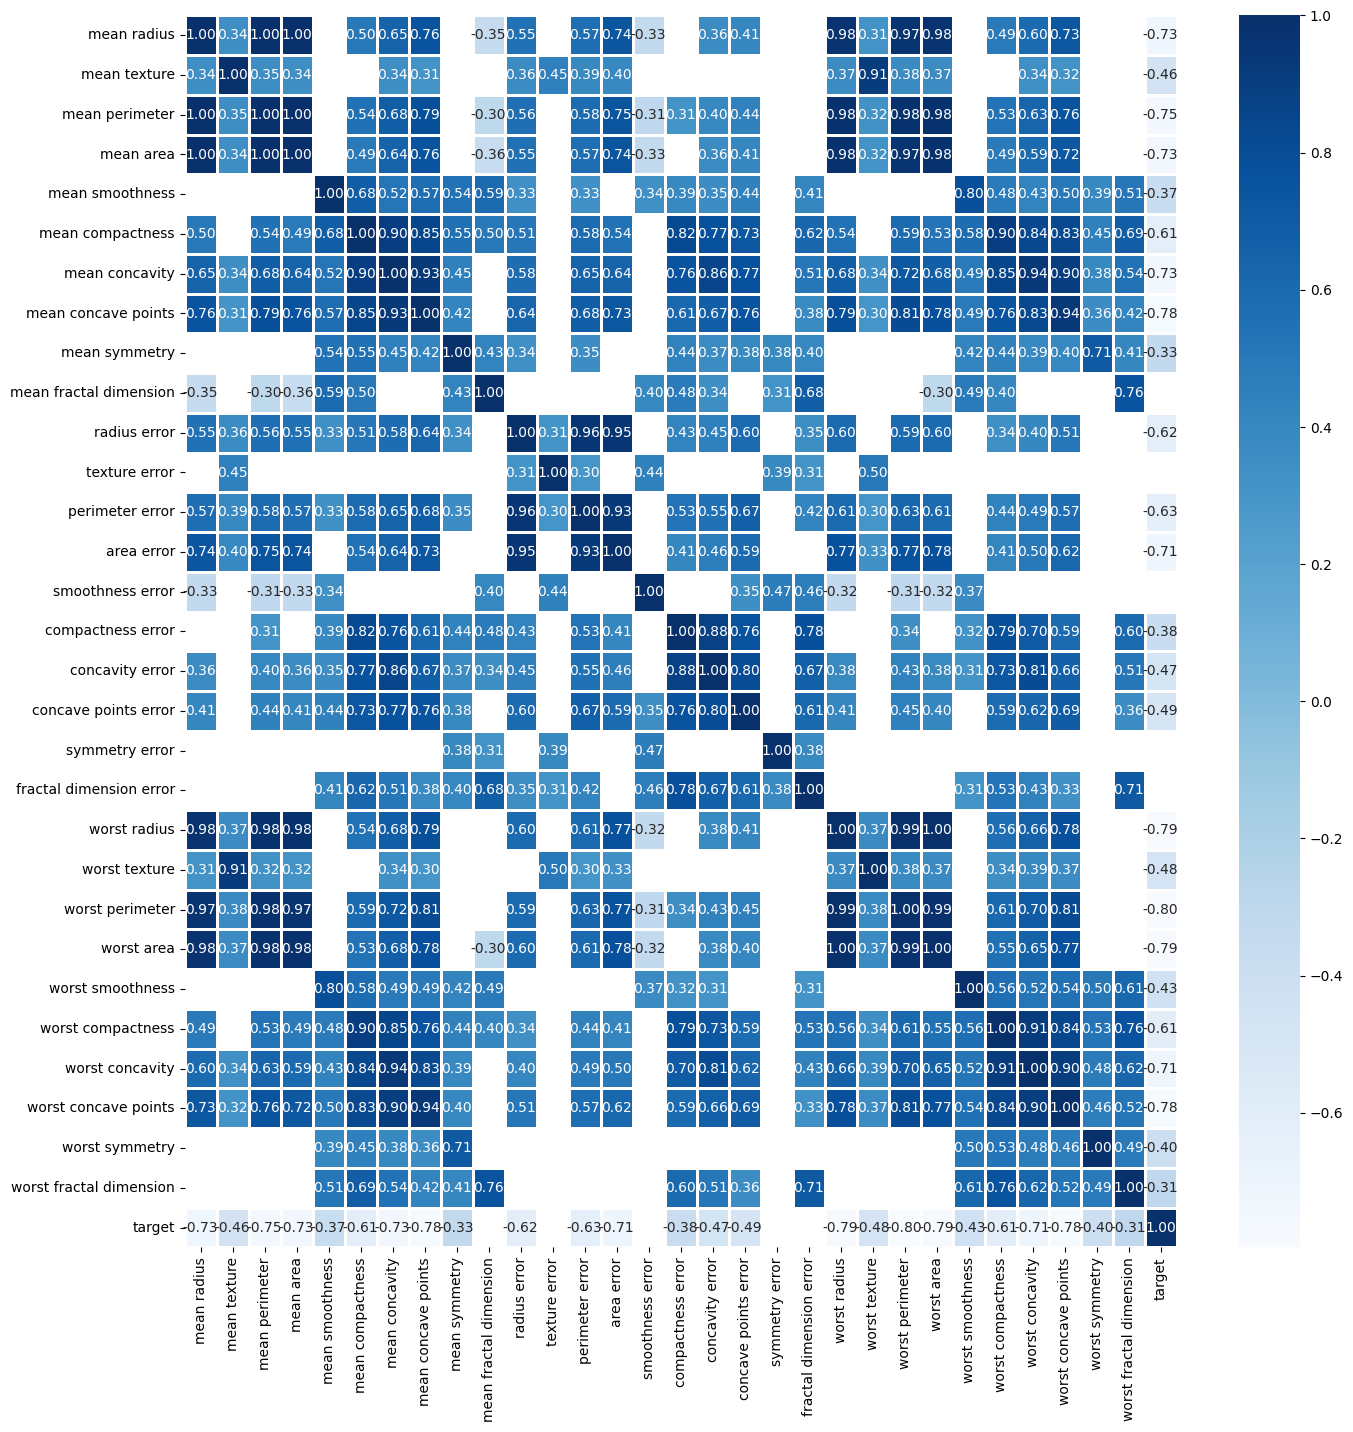

In [118]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(method='spearman')[df.corr(method='spearman').abs() > 0.3], cmap='Blues', annot=True, fmt='.2f', linewidths=2)
plt.show()

In [119]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, stratify=df['target'])

In [120]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [121]:
log_reg_cv = LogisticRegressionCV(cv=5, max_iter=1000, n_jobs=-1, scoring='f1').fit(X_train, y_train)

In [124]:
log_reg = LogisticRegression(penalty='l2', C=log_reg_cv.C_[0], n_jobs=-1).fit(X_train, y_train)
train_preds = log_reg.predict(X_train)
test_preds = log_reg.predict(X_test)

#### Метрики

In [125]:
print(f'Accuracy train {accuracy_score(y_train, train_preds)}')
print(f'Accuracy test {accuracy_score(y_test, test_preds)}')

Accuracy train 0.9899497487437185
Accuracy test 0.9766081871345029


In [126]:
from sklearn.metrics import f1_score
print(f'f1 train {f1_score(y_train, train_preds)}')
print(f'f1 test {f1_score(y_test, test_preds)}')

f1 train 0.9920318725099602
f1 test 0.981651376146789


In [155]:
train_probs = log_reg.predict_proba(X_train)
test_probs = log_reg.predict_proba(X_test)

In [156]:
test_probs = test_probs[:, 1]
train_probs = train_probs[:, 1]
log_reg.classes_

array([0, 1])

In [157]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_probs)

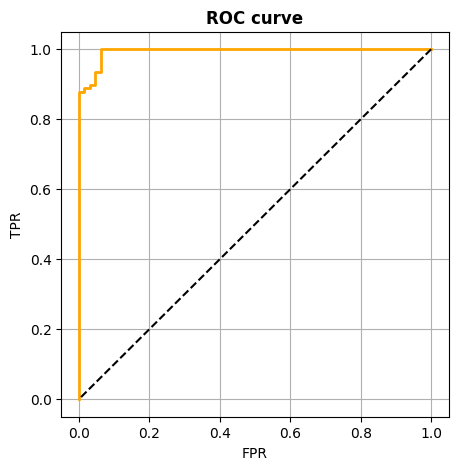

In [167]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='orange', linewidth=2)
plt.plot(thresholds, thresholds, linestyle='--', color='black')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve', fontweight='bold')
plt.grid()